## Deep Learning of the all  Outputs of the CsPbCI3QDs

### Normalize the Real data 

In [ ]:
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Load data
data = pd.read_excel("/Users/mehmetsiddik/Desktop/CsPbCl3_QDs.xlsx")

# Simple feature engineering: interactions
data['Cl_Pb_interact'] = data['Cl_mmol'] * data['Pb_mmol']

# Normalizing skewed features
data['Cl_mmol_log'] = np.log(data['Cl_mmol'] + 1)

# Outlier removal based on Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]

# Scaling features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the modified dataset to a new Excel file
data.to_excel("CsPbCI3_modified.xlsx")

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Read the data
excel_file = "/Users/mehmetsiddik/Desktop/CsPbCI3_modified.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

# Identify categorical columns
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1)
CsPbCl3_encoded = pd.concat([CsPbCl3_encoded, one_hot_encoded_df], axis=1)

# Target variables
targets = ['size_nm', 'S_abs_nm_Y1', 'PL']

for target in targets:
    print(f"Evaluating target: {target}")
    X = CsPbCl3_encoded.drop(target, axis=1)
    y = CsPbCl3_encoded[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.fillna(X_train.mean()))
    X_test_scaled = scaler.transform(X_test.fillna(X_train.mean()))

    # Defining the model
    model = Sequential([
        Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    # Training the model
    model.fit(X_train_scaled, y_train.fillna(y_train.mean()), epochs=100, batch_size=10, verbose=1, validation_split=0.2)

    # Predictions for train data
    predictions_train = model.predict(X_train_scaled)
    print("Performance for train data")
    print("R2:", r2_score(y_train.fillna(y_train.mean()), predictions_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train.fillna(y_train.mean()), predictions_train)))
    print("MAE:", mean_absolute_error(y_train.fillna(y_train.mean()), predictions_train))

    # Predictions for test data
    predictions_test = model.predict(X_test_scaled)
    print("Performance for test data")
    print("R2:", r2_score(y_test, predictions_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test)))
    print("MAE:", mean_absolute_error(y_test, predictions_test))
    print("\n")


Evaluating target: size_nm
Epoch 1/100
6/6 [==============================] - 3s 58ms/step - loss: 3.3249 - mae: 1.1793 - val_loss: 2.0530 - val_mae: 0.8934
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 4.1442 - mae: 1.3085 - val_loss: 1.9775 - val_mae: 0.8589
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 3.1524 - mae: 1.1236 - val_loss: 1.9082 - val_mae: 0.8207
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 3.8877 - mae: 1.3042 - val_loss: 1.8661 - val_mae: 0.7984
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 2.9026 - mae: 0.9895 - val_loss: 1.8387 - val_mae: 0.7874
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 3.0702 - mae: 1.1470 - val_loss: 1.8225 - val_mae: 0.7824
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 2.6538 - mae: 1.0118 - val_loss: 1.8037 - val_mae: 0.7771
Epoch 8/100
6/6 [==============================] - 0s 11ms/step

6/6 [==============================] - 0s 13ms/step - loss: 1.5129 - mae: 0.5902 - val_loss: 2.3427 - val_mae: 0.9840
Epoch 24/100
6/6 [==============================] - 0s 13ms/step - loss: 1.8268 - mae: 0.7743 - val_loss: 2.3397 - val_mae: 0.9807
Epoch 25/100
6/6 [==============================] - 0s 12ms/step - loss: 1.7011 - mae: 0.6979 - val_loss: 2.3405 - val_mae: 0.9774
Epoch 26/100
6/6 [==============================] - 0s 12ms/step - loss: 1.6532 - mae: 0.6562 - val_loss: 2.3430 - val_mae: 0.9791
Epoch 27/100
6/6 [==============================] - 0s 11ms/step - loss: 1.9173 - mae: 0.7926 - val_loss: 2.3399 - val_mae: 0.9784
Epoch 28/100
6/6 [==============================] - 0s 9ms/step - loss: 1.7050 - mae: 0.7426 - val_loss: 2.3275 - val_mae: 0.9796
Epoch 29/100
6/6 [==============================] - 0s 10ms/step - loss: 1.8352 - mae: 0.7696 - val_loss: 2.3280 - val_mae: 0.9856
Epoch 30/100
6/6 [==============================] - 0s 11ms/step - loss: 1.7298 - mae: 0.7195 - v

6/6 [==============================] - 0s 9ms/step - loss: 1.4822 - mae: 0.6482 - val_loss: 1.6389 - val_mae: 0.7209
Epoch 46/100
6/6 [==============================] - 0s 15ms/step - loss: 1.4886 - mae: 0.6742 - val_loss: 1.6330 - val_mae: 0.7185
Epoch 47/100
6/6 [==============================] - 0s 12ms/step - loss: 1.5215 - mae: 0.6474 - val_loss: 1.6285 - val_mae: 0.7161
Epoch 48/100
6/6 [==============================] - 0s 11ms/step - loss: 1.4025 - mae: 0.6363 - val_loss: 1.6226 - val_mae: 0.7119
Epoch 49/100
6/6 [==============================] - 0s 11ms/step - loss: 1.3775 - mae: 0.5720 - val_loss: 1.6167 - val_mae: 0.7089
Epoch 50/100
6/6 [==============================] - 0s 10ms/step - loss: 1.2939 - mae: 0.5348 - val_loss: 1.6122 - val_mae: 0.7061
Epoch 51/100
6/6 [==============================] - 0s 11ms/step - loss: 1.1809 - mae: 0.5306 - val_loss: 1.6071 - val_mae: 0.7048
Epoch 52/100
6/6 [==============================] - 0s 11ms/step - loss: 1.2612 - mae: 0.5478 - v

## Plots for Sample and Observed Values

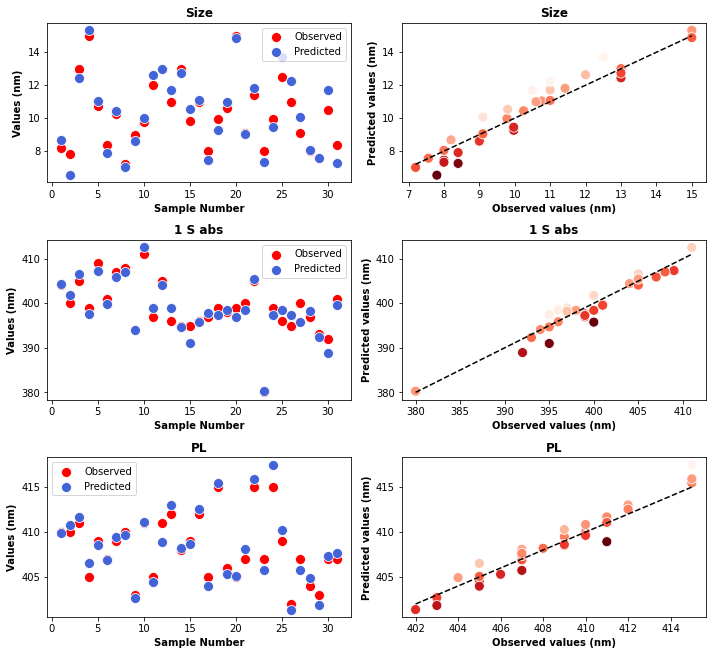

In [9]:
# Plotting
fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Adjust the figure size as needed

# Define the titles for the plots
titles = ['Size', '1 S abs', 'PL']

# Loop through the rows and create the plots for sample numbers and observed vs predicted
for i, target in enumerate(targets):
    y_test = predictions[target]['y_test']
    predictions_test = predictions[target]['predictions_test']
    
    # Plot (a): Sample Number vs Predicted Values
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=y_test.values, ax=axs[i, 0], label='Observed', color='red', s=100)
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=predictions_test, ax=axs[i, 0], label='Predicted', color='#4363d8', s=100)
    axs[i, 0].set(xlabel='Sample Number', ylabel='Values (nm)', title=f'{titles[i]}')
    axs[i, 0].set_title(f'{titles[i]}', fontweight='bold', fontsize=12)
    axs[i, 0].set_xlabel('Sample Number', fontweight='bold', fontsize=10)
    axs[i, 0].set_ylabel('Values (nm)', fontweight='bold', fontsize=10)
    axs[i, 0].legend()

    # Plot (b): Observed vs Predicted Values
    residuals = y_test.values - predictions_test
    sns.scatterplot(x=y_test.values, y=predictions_test, hue=residuals, ax=axs[i, 1], palette='Reds', s=100)
    axs[i, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    axs[i, 1].set(xlabel='Observed values (nm)', ylabel='Predicted values (nm)', title=f'{titles[i]}')
    axs[i, 1].set_title(f'{titles[i]}', fontweight='bold', fontsize=12)
    axs[i, 1].set_xlabel('Observed values (nm)', fontweight='bold', fontsize=10)
    axs[i, 1].set_ylabel('Predicted values (nm)', fontweight='bold', fontsize=10)
    axs[i, 1].get_legend().remove()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()